<a href="https://colab.research.google.com/github/valenvergara25/Valentina-Vergara-ModelosPredictivos/blob/main/semana2/Copia_de_Ejercicio_LimpiezaPandas_ValentinaVergara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Ejercicio: Limpieza usando pandas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Cargar el dataset DailyDelhiClimateTrain.csv
dataDelhi = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
dataDelhi.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
# Verificar las estadísticas generales del dataset
# Revisar la información, encuentre en los datos máximos y mínimos de las variables
# Revisar si encuentra algo fuera de lo normal
dataDelhi.describe()
#Los valores mínimos y máximos de meanpressure son atipicos, porque tenemos un valor negativo y el maximo es extremadamente alto.
#La desviación estándar de meanpressure es bastante alta, lo que indica una gran dispersion en los datos.

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [4]:
# Eliminar las columnas meantemp, humidity y wind_speed. Mantenga la columna meanpressure
data_aux = dataDelhi.drop(['meantemp', 'humidity', 'wind_speed'], axis = 1)
data_aux.head()

,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


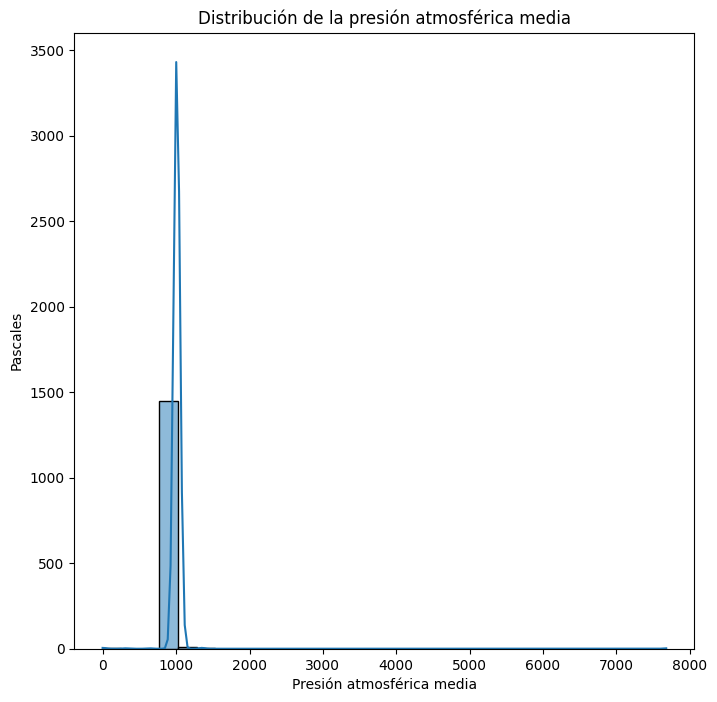

In [29]:
import matplotlib.dates as mdates
%matplotlib inline

# Graficar los datos del campo meanpressure
plt.figure(figsize=(8, 8))
sns.histplot(dataDelhi['meanpressure'], bins=30, kde=True)#Histograma divido en rando de 30 intervalos con una curva de densidad sobre el histograma
plt.title('Distribución de la presión atmosférica media')
plt.xlabel('Presión atmosférica media')
plt.ylabel('Pascales')
plt.show()
# Qué puede decir de la gráfica? - Cuando la presion atmosferica alcanza niveles de 1000, la frecuencia llega a su pico mas alto de lo normal alcanzando niveles de 3500 Hz
# Hay algo atípico en esa respuesta temporal? Datos de frecuencia en el pico mas alto de medicion

<Axes: ylabel='meanpressure'>

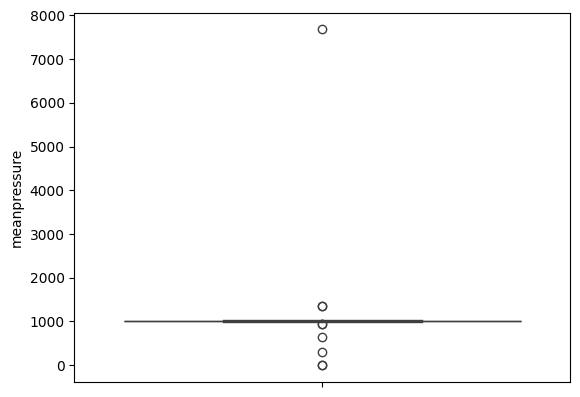

In [7]:
# Realice un diagrama de cajas y alambres para determinar visualmente si hay outliers
sns.boxplot(data = dataDelhi['meanpressure']) #Verificar datos atipcos o no

In [8]:
# Calcular el parámetro Zscore para la columna meanpressure
Zscore = np.abs(stats.zscore(dataDelhi.loc[:, ['meanpressure']]))
index, flag = np.where(Zscore > 3)
print(index)
print(flag)

[1182 1309 1323 1427]
[0 0 0 0]


In [22]:
# Variar el valor del humbral de Zscore para filtrar valores atípicos hasta que considere que la gráfica de la variable
#  meanpressure sea correcta
Zscore = np.abs(stats.zscore(dataDelhi.loc[:, ['meanpressure']]))
index, flag = np.where(Zscore > 1)
print(index)
print(flag)

[1182 1309 1321 1323 1362 1416 1427]
[0 0 0 0 0 0 0]


In [ ]:
dataCopy = dataDelhi.copy(deep = True)
dataCopy.head() #Copia profunda

In [24]:
# Eliminar los valores atípicos
dataDelhi_clean = dataDelhi[(Zscore < 1).all(axis=1)]

In [27]:
# Para los datos sin outliers verificar nuevamente las estadísticas generales
# Qué puede decir de los valores máximos y mínimos de los datos filtrados
dataDelhi_clean.describe()
#Los valores mínimos y máximos de meanpressure se encuentran regulados, ya no tenemos ningun valor negativo.
#La desviación estándar de meanpressure se encuentra entre los valores correctos en relacion con las demas columnas, lo que indica una correlacion en el proceso.


,meantemp,humidity,wind_speed,meanpressure
count,1455.000000,1455.000000,1455.000000,1455.000000
mean,25.486006,60.768149,6.793566,1008.178187
std,7.359717,16.781011,4.565621,7.827299
min,6.000000,13.428571,0.000000,938.066667
25%,18.791667,50.343750,3.475000,1001.625000
50%,27.714286,62.625000,6.166667,1008.571429
75%,31.343750,72.250000,9.226471,1014.906250
max,38.714286,100.000000,42.220000,1023.000000


<Axes: ylabel='meanpressure'>

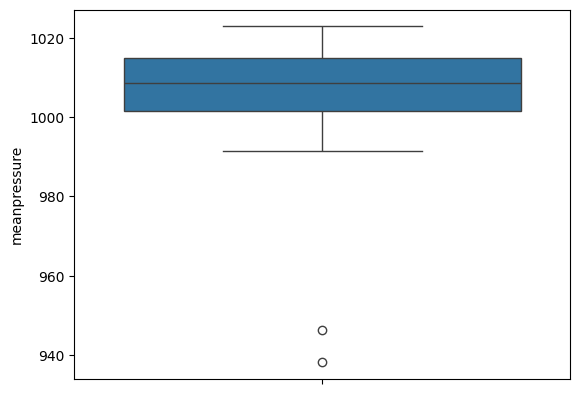

In [28]:
# Realice un diagrama de cajas y alambres para determinar visualmente si aún hay outliers
sns.boxplot(data = dataDelhi_clean['meanpressure']) #Aun se encuentran dos datos atipicos